In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data_train = pd.read_csv("Data/train.csv")
data_test = pd.read_csv("Data/test.csv")

In [132]:
data_train.shape, data_test.shape

((891, 12), (418, 11))

In [133]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
data_train['Embarked'].fillna('U', inplace=True)
data_train['Cabin'].fillna('U', inplace=True)
data_train['Parch'].fillna(0, inplace=True)
data_train['SibSp'].fillna(0, inplace=True)
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
data_train['Sex'].fillna('U', inplace=True)
data_train['Pclass'].fillna(0, inplace=True)

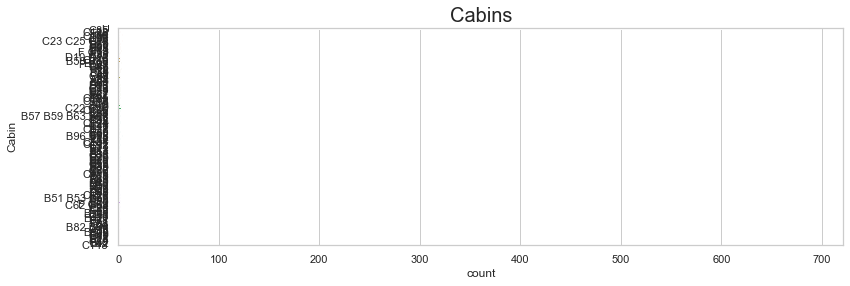

In [135]:
fig, ax = plt.subplots(figsize=(13,4))
sns.set(style="whitegrid")
sns.countplot(ax=ax, y="Cabin", data=data_train).set_title("Cabins",fontsize=20)
plt.show()

In [136]:
data_train['Cabin'].value_counts()

U                  687
C23 C25 C27          4
B96 B98              4
G6                   4
D                    3
E101                 3
F33                  3
C22 C26              3
F2                   3
E121                 2
C2                   2
E33                  2
C78                  2
B20                  2
D33                  2
B58 B60              2
B18                  2
E24                  2
C93                  2
B28                  2
B57 B59 B63 B66      2
E44                  2
C52                  2
C124                 2
D17                  2
B22                  2
D36                  2
C68                  2
C125                 2
E25                  2
                  ... 
C82                  1
D45                  1
C49                  1
A7                   1
A19                  1
B80                  1
D37                  1
B42                  1
B69                  1
B4                   1
D46                  1
A20                  1
A14        

In [137]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
U      2
Name: Embarked, dtype: int64

In [138]:
data_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [139]:
data_train['Parch'] = data_train['Parch'].apply(lambda x : x+1)

In [140]:
data_train['Parch'].value_counts()

1    678
2    118
3     80
6      5
4      5
5      4
7      1
Name: Parch, dtype: int64

In [141]:
data_train['SibSp'].value_counts()
data_train['SibSp'] = data_train['SibSp'].apply(lambda x : x+1)

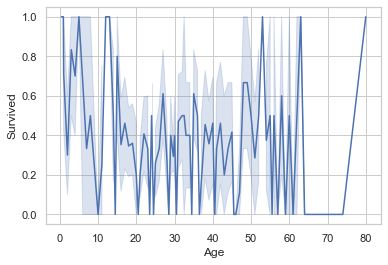

In [142]:
sns.lineplot(x='Age', y='Survived', data=data_train)
# plt.xlim(0, 150)

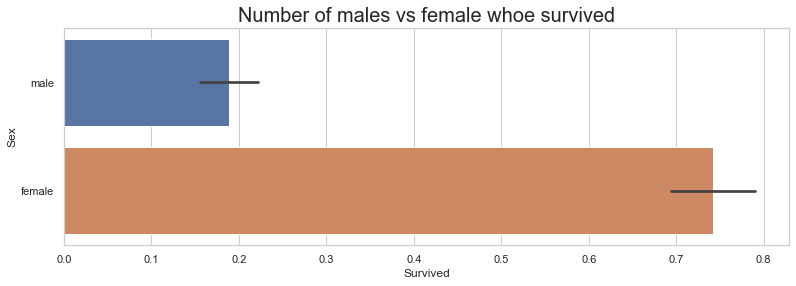

In [144]:
fig, ax = plt.subplots(figsize=(13,4))
sns.set(style="whitegrid")
sns.barplot(x="Survived", y="Sex", data=data_train).set_title("Number of males vs female whoe survived",fontsize=20)
plt.show()

In [119]:
dummies = pd.get_dummies(data['Sex'])
data_train = pd.concat([data_train, dummies], axis=1)
data_train.shape

(891, 14)

In [120]:
dummies = pd.get_dummies(data['Cabin'])
data_train = pd.concat([data_train, dummies], axis=1)
data_train.shape

(891, 161)

In [121]:
dummies = pd.get_dummies(data['Embarked'])
data_train = pd.concat([data_train, dummies], axis=1)
data_train.shape

(891, 164)

In [122]:
data_train = data_train.drop(columns=['Sex', 'Cabin', 'Embarked', 'Name', 'PassengerId', 'Ticket'])

In [123]:
data_train.shape

(891, 158)

In [124]:
Y = data_train['Survived']
X = data_train.drop(columns=['Survived'])

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [126]:
clf = LogisticRegression()

In [127]:
clf.fit(x_train, y_train)

/Users/preritgarg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
clf.score(x_train, y_train)

0.815230961298377

In [129]:
clf.score(x_test, y_test)

0.8333333333333334